# Libraries

In [60]:
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import re

# Loading Data and Initial Treatment

In [61]:
#vizualizing our data

all_files = os.listdir()
olist_files = [i for i in all_files if re.match('olist_',i)]

for file in olist_files:
    provisory_df = pd.read_csv(file)
    print(f'\nfile name: {file}',
          f'\nfile shape: {provisory_df.shape}')
    display(provisory_df.head())


file name: olist_customers_dataset.csv 
file shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



file name: olist_geolocation_dataset.csv 
file shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



file name: olist_orders_dataset.csv 
file shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



file name: olist_order_items_dataset.csv 
file shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



file name: olist_order_payments_dataset.csv 
file shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



file name: olist_order_reviews_dataset.csv 
file shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



file name: olist_products_dataset.csv 
file shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



file name: olist_sellers_dataset.csv 
file shape: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [62]:
#Lets load the most relevant dfs for now
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')  
olist_sellers_dataset= pd.read_csv('olist_sellers_dataset.csv')  

In [63]:
#create a single df with most relevant infos 
eda_df = pd.merge(olist_order_items_dataset, olist_products_dataset,how = 'left', on = 'product_id')
eda_df = pd.merge(eda_df, olist_order_payments_dataset,how = 'left', on ='order_id')
eda_df = pd.merge(eda_df,olist_sellers_dataset, how = 'left', on ='seller_id')
eda_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [64]:
#filtering the data
eda_df_resumed = eda_df[['order_id','order_item_id','product_category_name','price',
                         'freight_value','payment_type','payment_installments',
                         'payment_value', 'seller_city','seller_state','shipping_limit_date']]

eda_df_resumed

,order_id,order_item_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff,58.90,13.29,credit_card,2.0,72.19,volta redonda,SP,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,pet_shop,239.90,19.93,credit_card,3.0,259.83,sao paulo,SP,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,moveis_decoracao,199.00,17.87,credit_card,5.0,216.87,borda da mata,MG,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,perfumaria,12.99,12.79,credit_card,2.0,25.78,franca,SP,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ferramentas_jardim,199.90,18.14,credit_card,3.0,218.04,loanda,PR,2017-02-13 13:57:51
...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,utilidades_domesticas,299.99,43.41,boleto,1.0,343.40,itajai,SC,2018-05-02 04:11:01
117600,fffcd46ef2263f404302a634eb57f7eb,1,informatica_acessorios,350.00,36.53,boleto,1.0,386.53,sao paulo,SP,2018-07-20 04:31:48
117601,fffce4705a9662cd70adb13d4a31832d,1,esporte_lazer,99.90,16.95,credit_card,3.0,116.85,curitiba,PR,2017-10-30 17:14:25
117602,fffe18544ffabc95dfada21779c9644f,1,informatica_acessorios,55.99,8.72,credit_card,3.0,64.71,sao paulo,SP,2017-08-21 00:04:32


In [65]:
#missing values

eda_df_resumed2 = eda_df_resumed.copy()
print('general view of nan values:')
display(eda_df_resumed[eda_df_resumed.isna().any(axis=1)].head())

print('When product_category_name is nan, it means that the product just dont have a category defined,'
      ' so filing it with NA  seems appropriate')
eda_df_resumed2.product_category_name.fillna('NA', inplace = True)

print('\nview of nan values after treating category names:')
display(eda_df_resumed2[eda_df_resumed2.isna().any(axis=1)])
print(f'\nthere are only {len(eda_df_resumed2[eda_df_resumed2.isna().any(axis=1)])}' 
      f' nan values, so we will just drop them')    
eda_df_resumed2 = eda_df_resumed2[~pd.isnull(eda_df_resumed2.payment_type)].reset_index(drop=True)
eda_df_resumed2

general view of nan values:


,order_id,order_item_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,shipping_limit_date
125,0046e1d57f4c07c8c92ab26be8c3dfc0,1,NaN,7.79,7.78,credit_card,1.0,15.57,sao paulo,SP,2017-10-02 15:49:17
127,00482f2670787292280e0a8153d82467,1,NaN,7.60,10.96,boleto,1.0,18.56,juiz de fora,MG,2017-02-17 16:18:07
134,004f5d8f238e8908e6864b874eda3391,1,NaN,122.99,15.61,boleto,1.0,138.60,guarulhos,SP,2018-03-06 09:29:25
144,0057199db02d1a5ef41bacbf41f8f63b,1,NaN,20.30,16.79,boleto,1.0,37.09,limeira,SP,2018-01-25 09:07:51
173,006cb7cafc99b29548d4f412c7f9f493,1,NaN,56.00,14.14,credit_card,3.0,70.14,sao paulo,SP,2018-02-22 13:35:28


When product_category_name is nan, it means that the product just dont have a category defined, so filing it with NA  seems appropriate

view of nan values after treating category names:


,order_id,order_item_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,shipping_limit_date
88091,bfbd0f9bdef84302105ad712db648a6c,1,beleza_saude,44.99,2.83,NaN,NaN,NaN,curitiba,PR,2016-09-19 23:11:33
88092,bfbd0f9bdef84302105ad712db648a6c,2,beleza_saude,44.99,2.83,NaN,NaN,NaN,curitiba,PR,2016-09-19 23:11:33
88093,bfbd0f9bdef84302105ad712db648a6c,3,beleza_saude,44.99,2.83,NaN,NaN,NaN,curitiba,PR,2016-09-19 23:11:33



there are only 3 nan values, so we will just drop them


,order_id,order_item_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff,58.90,13.29,credit_card,2.0,72.19,volta redonda,SP,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,pet_shop,239.90,19.93,credit_card,3.0,259.83,sao paulo,SP,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,moveis_decoracao,199.00,17.87,credit_card,5.0,216.87,borda da mata,MG,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,perfumaria,12.99,12.79,credit_card,2.0,25.78,franca,SP,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ferramentas_jardim,199.90,18.14,credit_card,3.0,218.04,loanda,PR,2017-02-13 13:57:51
...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,utilidades_domesticas,299.99,43.41,boleto,1.0,343.40,itajai,SC,2018-05-02 04:11:01
117597,fffcd46ef2263f404302a634eb57f7eb,1,informatica_acessorios,350.00,36.53,boleto,1.0,386.53,sao paulo,SP,2018-07-20 04:31:48
117598,fffce4705a9662cd70adb13d4a31832d,1,esporte_lazer,99.90,16.95,credit_card,3.0,116.85,curitiba,PR,2017-10-30 17:14:25
117599,fffe18544ffabc95dfada21779c9644f,1,informatica_acessorios,55.99,8.72,credit_card,3.0,64.71,sao paulo,SP,2017-08-21 00:04:32


# Exploratory Analysis

In [66]:
#Taking a quick look at our data
statistic_summary = eda_df_resumed2.copy()
display(statistic_summary.describe())
statistic_summary.describe(include ='O')

,order_item_id,price,freight_value,payment_installments,payment_value
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,1.195900,120.824783,20.045990,2.939482,172.686752
std,0.697706,184.479323,15.861315,2.774223,267.592290
min,1.000000,0.850000,0.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,1.000000,60.870000
50%,1.000000,74.900000,16.290000,2.000000,108.210000
75%,1.000000,134.900000,21.190000,4.000000,189.260000
max,21.000000,6735.000000,409.680000,24.000000,13664.080000


,order_id,product_category_name,payment_type,seller_city,seller_state,shipping_limit_date
count,117601,117601,117601,117601,117601,117601
unique,98665,74,4,611,23,93317
top,895ab968e7bb0d5659d16cd74cd1650c,cama_mesa_banho,credit_card,sao paulo,SP,2017-08-14 20:43:31
freq,63,11823,86769,29157,83854,63


In [67]:
#let's create a summary to better understand the sales categories

eda_df_resumed3 = eda_df_resumed2.copy()

#creating columns to summarize payment type
for payment_type in eda_df_resumed2.payment_type.unique():
    eda_df_resumed3[payment_type] = [1 if i ==payment_type else 0 for i in eda_df_resumed2.payment_type]
    
#creating columns to summarize infos about the state of sales
for state in eda_df_resumed2.seller_state.unique():
    eda_df_resumed3[state] = [1 if i ==state else 0 for i in eda_df_resumed2.seller_state]
 

category_summary = eda_df_resumed2.groupby('product_category_name',as_index = False).agg({'price':'sum',
                                                                                          'freight_value':'sum',
                                                                                          'payment_installments':'mean',
                                                                                          'payment_value':'mean',
                                                                                          'order_id':'count'
                                                                                         })

dummy_variable_df = eda_df_resumed3.iloc[:,11:]
dummy_variable_df['product_category_name'] = eda_df_resumed3['product_category_name']
dummy_variable_df_gb = dummy_variable_df.groupby('product_category_name',as_index=False).sum()

category_summary2 = pd.merge(category_summary,dummy_variable_df_gb, how='left', on = 'product_category_name')
category_summary2.sort_values(by=['price'],ascending = False,inplace=True)
category_summary2.reset_index(drop=True, inplace=True)
category_summary2

,product_category_name,price,freight_value,payment_installments,payment_value,order_id,credit_card,boleto,voucher,debit_card,...,MT,CE,RN,PE,SE,MS,PB,PA,AM,AC
0,beleza_saude,1297355.80,188524.49,3.020658,166.202680,9972,7566,1860,389,157,...,52,30,1,4,0,30,0,0,0,0
1,relogios_presentes,1253143.30,104335.52,3.672956,230.481645,6201,4858,1025,255,63,...,0,0,0,3,0,0,16,0,0,0
2,cama_mesa_banho,1092551.02,217733.11,3.553159,144.849334,11823,8959,1875,847,142,...,0,1,0,0,5,0,15,0,0,0
3,esporte_lazer,1023996.34,174528.01,2.505198,155.631924,8945,6635,1772,411,127,...,0,0,8,4,0,0,1,8,0,0
4,informatica_acessorios,942277.57,153179.41,2.253898,196.155710,8082,5436,2158,340,148,...,0,0,0,385,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,flores,1110.04,488.87,1.363636,67.060909,33,26,7,0,0,...,0,0,0,0,0,0,0,0,0,0
70,casa_conforto_2,773.17,421.27,1.451613,55.178710,31,23,6,2,0,...,0,0,0,0,0,0,0,0,0,0
71,cds_dvds_musicais,730.00,224.99,2.571429,85.673571,14,9,5,0,0,...,0,0,0,0,0,0,0,0,0,0
72,fashion_roupa_infanto_juvenil,569.85,95.51,1.875000,98.208750,8,5,3,0,0,...,0,0,0,0,0,0,0,0,0,0


consider that we have 74 categories in total
 


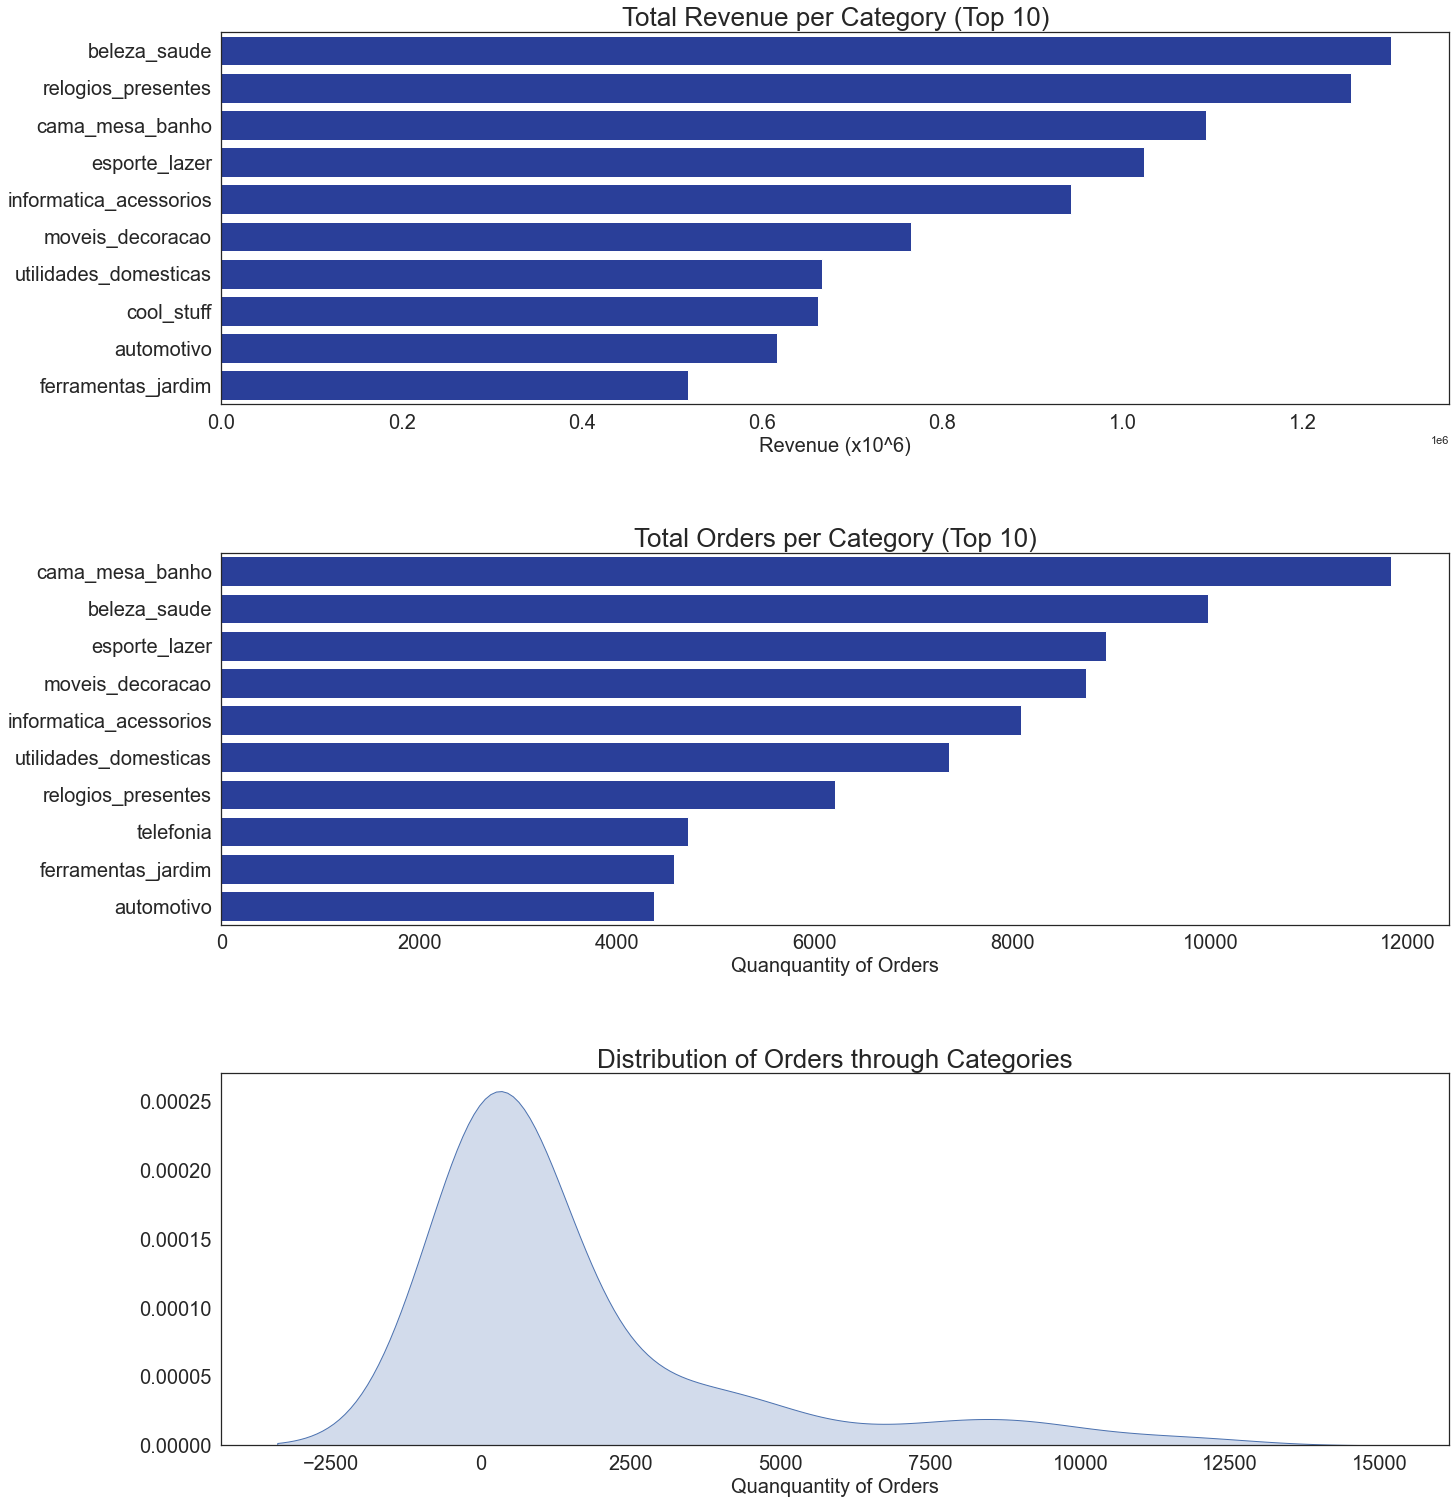

In [181]:
#viewing the data

sns.set_style("white")
print(f'consider that we have {len(category_summary2)} categories in total\n ')
fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(22,26))

sns.barplot(y=category_summary2.product_category_name[0:10],
            x=category_summary2.price[0:10],
            color ='#1833ab', ax = ax1)

ax1.set_title("Total Revenue per Category (Top 10)",fontsize = 26)
ax1.set_xlabel("Revenue (x10^6)",fontsize=20)
ax1.set_ylabel("",fontsize=20)
ax1.tick_params(labelsize=20)


category_summary2_orders = category_summary2.sort_values(by=['order_id'],ascending = False)
sns.barplot(y=category_summary2_orders.product_category_name[0:10],
            x=category_summary2_orders.order_id[0:10],
            color ='#1833ab', ax = ax2)

ax2.set_title("Total Orders per Category (Top 10)",fontsize = 26)
ax2.set_xlabel("Quanquantity of Orders",fontsize=20)
ax2.set_ylabel("",fontsize=20)
ax2.tick_params(labelsize=20)


sns.kdeplot(data =category_summary2_orders.order_id,shade =True, ax = ax3)
ax3.set_title("Distribution of Orders through Categories",fontsize = 26)
ax3.set_xlabel("Quanquantity of Orders",fontsize=20)
ax3.set_ylabel("",fontsize=20)
ax3.tick_params(labelsize=20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

we noticed that few categories are responsible for a large part of the total revenue

lets take a closer look in the most ordered categories by states
We are going to consider states with more than 500 orders

Total Sales in state SP: 83854
Corresponding to 71.3% of all orders


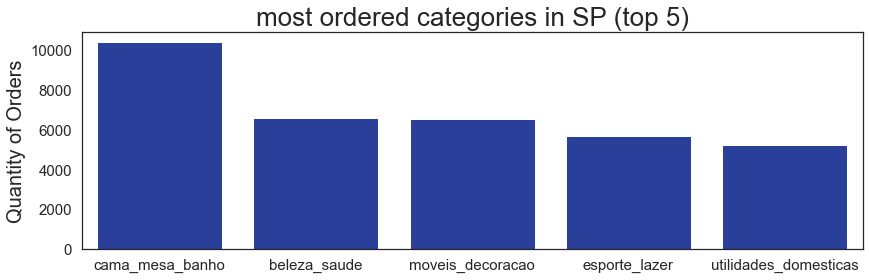

Total Sales in state MG: 9260
Corresponding to 7.87% of all orders


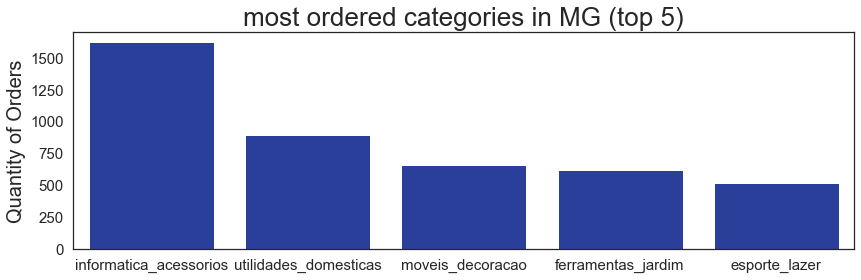

Total Sales in state PR: 9014
Corresponding to 7.66% of all orders


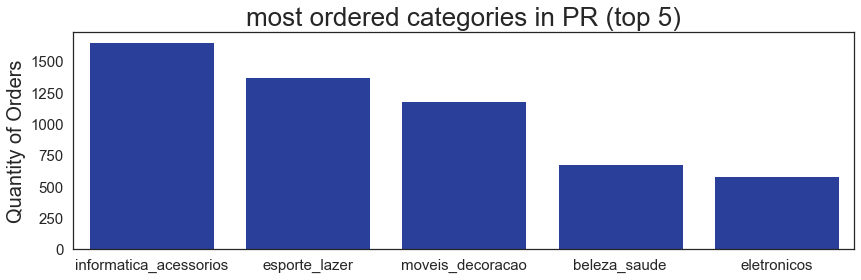

Total Sales in state SC: 4257
Corresponding to 3.62% of all orders


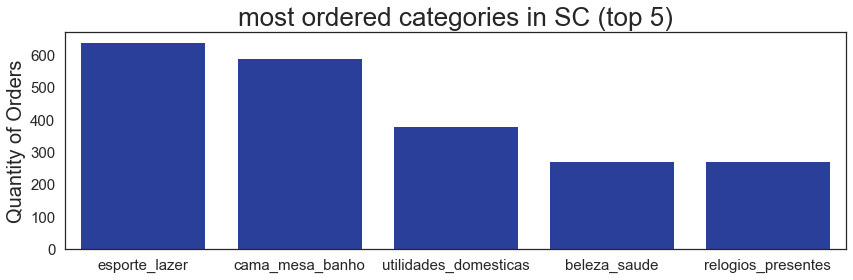

Total Sales in state RJ: 5017
Corresponding to 4.27% of all orders


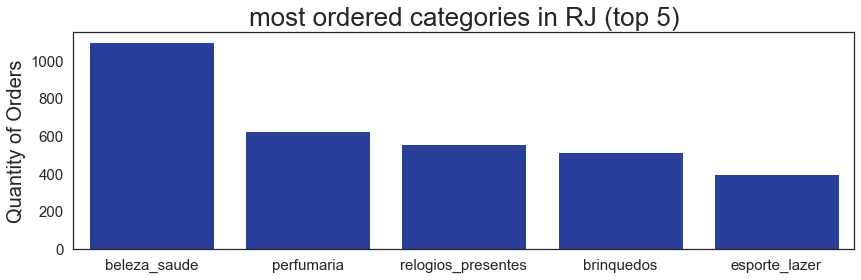

In [69]:
#viewing the data

print('lets take a closer look in the most ordered categories by states' 
      '\nWe are going to consider states with more than 500 orders\n')

states_df = category_summary2.copy()
for state in eda_df_resumed2.seller_state.unique():
    states_df.sort_values(by=[state],ascending = False, inplace = True)
    states_df.reset_index(drop=True, inplace=True)
    if states_df[state][0] > 500:
        fig, (ax1) = plt.subplots(figsize=(14,4))
        sns.barplot(x =states_df.product_category_name[0:5] ,
                    y = states_df[state][0:5],
                   color ='#1833ab',
                   ax =ax1)
        title = 'most ordered categories in ' + state +' (top 5)'
        ax1.set_title(title,fontsize = 26)
        ax1.set_ylabel("Quantity of Orders",fontsize=20)
        ax1.set_xlabel("",fontsize=20)
        ax1.tick_params(labelsize=15)
        print(f'Total Sales in state {state}: {states_df[state].sum()}'
              f'\nCorresponding to {round(states_df[state].sum()*100/len(eda_df_resumed3),2)}% of all orders')
        plt.show()


In [70]:
#let's create a summary to better understand the sales by states 

state_df = eda_df_resumed2.groupby(
    'seller_state',as_index = False).agg({'payment_value':'sum',
                                          'freight_value':'mean',
                                          'order_id':'count'
                                         }).sort_values(by=['order_id'],ascending = False).reset_index(drop=True)

state_df['sales_revenue_percent'] = [i*100/sum(state_df.payment_value) for i in state_df.payment_value]
state_df['sales_orders_percent'] = [i*100/sum(state_df.order_id) for i in state_df.order_id]
state_df

,seller_state,payment_value,freight_value,order_id,sales_revenue_percent,sales_orders_percent
0,SP,13369880.61,18.486928,83854,65.835099,71.303815
1,MG,1564757.80,24.131429,9260,7.705079,7.874083
2,PR,1846047.66,22.875830,9014,9.090188,7.664901
3,RJ,1098242.23,19.495928,5017,5.407893,4.266120
4,SC,886745.47,26.173827,4257,4.366455,3.619867
5,RS,560236.38,26.104380,2283,2.758680,1.941310
6,DF,137784.98,21.642988,947,0.678472,0.805265
7,BA,367899.46,31.120759,698,1.811587,0.593532
8,GO,112183.09,24.349636,549,0.552405,0.466833
9,PE,124894.83,27.886925,465,0.614999,0.395405


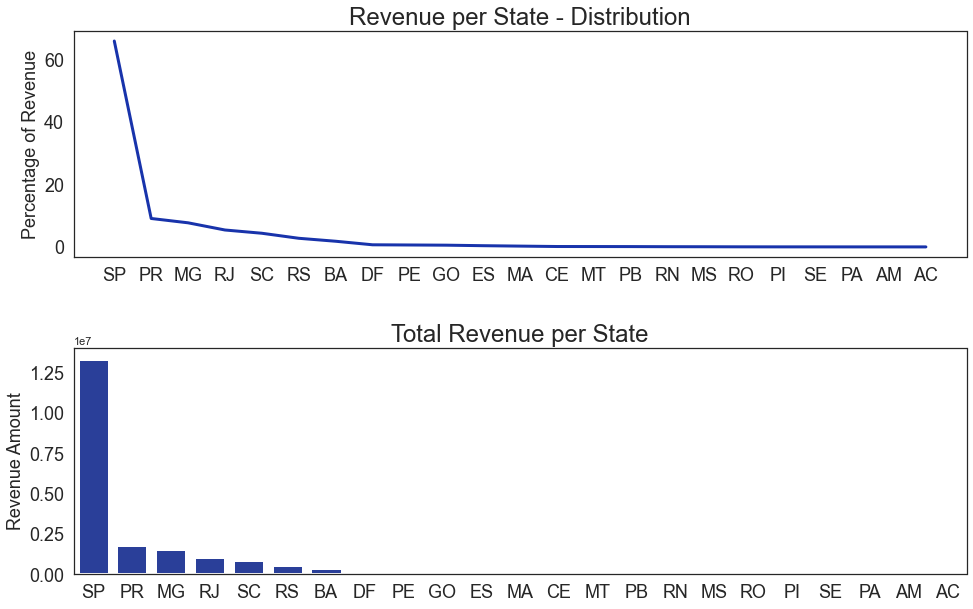

In [169]:
#viewing the data

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,10))
state_df.sort_values(by =['sales_revenue_percent'],ascending = False, inplace= True)
sns.set_style("white")
sns.lineplot(y=state_df.sales_revenue_percent,
            x=state_df.seller_state,
            color ='#1833ab',lw =3, ax = ax1)

ax1.set_title("Revenue per State - Distribution",fontsize = 24)
ax1.set_xlabel("",fontsize=18)
ax1.set_ylabel("Percentage of Revenue",fontsize=18)
ax1.tick_params(labelsize=18)

state_df.sort_values(by =['payment_value'],ascending = False, inplace= True)

sns.barplot(y=state_df.payment_value,
            x=state_df.seller_state,
            color ='#1833ab',lw =3, ax = ax2)

ax2.set_title("Total Revenue per State",fontsize = 24)
ax2.set_xlabel("",fontsize=18)
ax2.set_ylabel("Revenue Amount",fontsize=18)
ax2.tick_params(labelsize=18)

plt.subplots_adjust(hspace = 0.4)
plt.show()

<div class="mark">
We can also analyse the the payment methods.
    
The voucher method, in Special,  probably indicates some kind of promotion.
    
    
Are vouchers used equally in any category?
    
or people tend to use vouchers in specific categories?
</div><i class="fa fa-lightbulb-o "></i>

In [146]:
payment_summary = category_summary2.copy()
payment_summary = payment_summary.iloc[:,:10]

payment_summary['voucher_percentage'] = payment_summary.apply(
    lambda x: round(x.voucher*100/x.order_id,2),axis =1)

payment_summary.sort_values(by=['order_id'],ascending = False,inplace= True)
payment_summary['top_ten_ordered'] = [
    'In Top 10 Most Ordered Categories' if n<10 else 
    'NOT In Top 10 Most Ordered Categories' for n in range(len(payment_summary))]

payment_summary.sort_values(by=['voucher_percentage'],ascending = False,inplace= True)
payment_summary.reset_index(drop=True,inplace = True)
payment_summary.head()

,product_category_name,price,freight_value,payment_installments,payment_value,order_id,credit_card,boleto,voucher,debit_card,voucher_percentage,top_ten_ordered
0,agro_industria_e_comercio,83841.95,6966.82,2.952381,471.153214,252,145,60,42,5,16.67,NOT In Top 10 Most Ordered Categories
1,moveis_quarto,21925.68,5504.19,2.848000,252.791520,125,76,30,18,1,14.40,NOT In Top 10 Most Ordered Categories
2,la_cuisine,2303.98,386.89,4.250000,182.095625,16,13,1,2,0,12.50,NOT In Top 10 Most Ordered Categories
3,eletrodomesticos_2,123265.31,12377.27,4.104478,464.789030,268,185,46,31,6,11.57,NOT In Top 10 Most Ordered Categories
4,dvds_blu_ray,6459.14,1430.85,2.070423,111.764507,71,48,15,8,0,11.27,NOT In Top 10 Most Ordered Categories


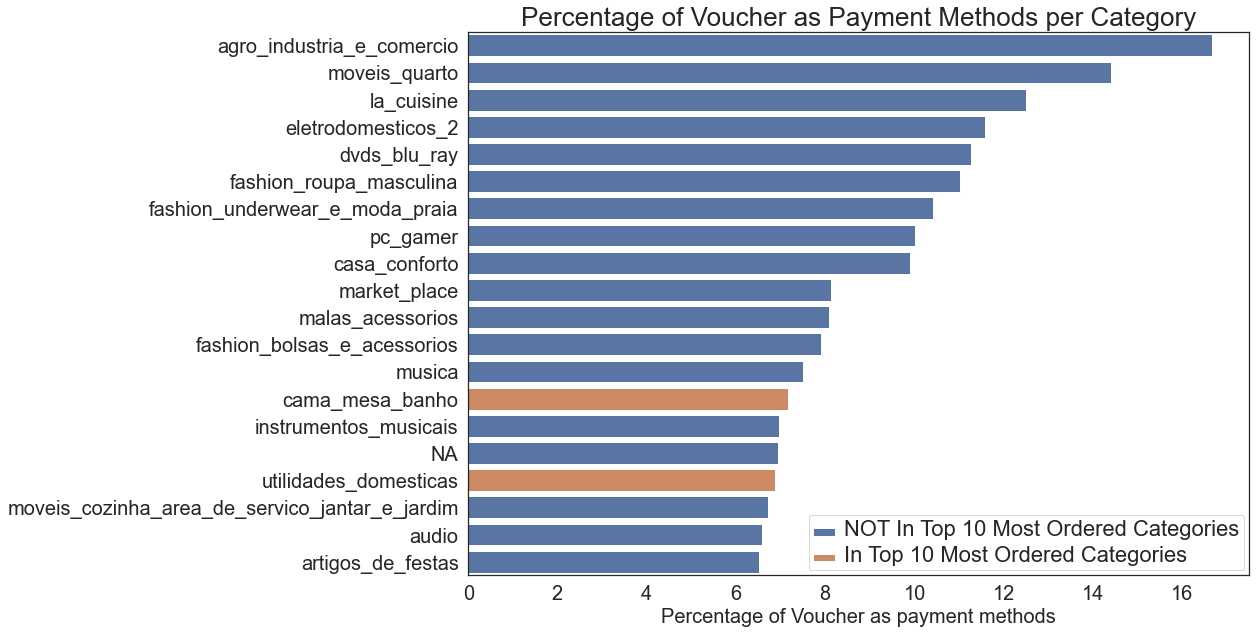

In [157]:
fig, (ax1) = plt.subplots(1,1,figsize=(14,10))

sns.barplot(y = 'product_category_name',
            x = 'voucher_percentage',
            data = payment_summary[0:20],
            hue = 'top_ten_ordered',
            dodge = False,
            ax =ax1)

ax1.legend()
ax1.set_title('Percentage of Voucher as Payment Methods per Category',fontsize = 26)
ax1.set_ylabel("",fontsize=20)
ax1.set_xlabel("Percentage of Voucher as payment methods",fontsize=20)
ax1.tick_params(labelsize=20)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') 
plt.show()




<div class="mark">
Insights:


First, we note that our sales are heavily concentrated in the state of SP. Thus, it is interesting to think of strategies to increase sales in other states.

We also noticed that the most requested categories in the state of SP are radically different from the most requested in the states of MG and PR (2nd and 3rd places in number of requests). While in SP we have the categories cama_mesa_banho and Beleza_saude (towels_tablecloth; beauty_health) as leaders, in PR and MG we observe informatica_acessorios (computer_accessories) in the front. It is worth noting that the category of informatica_acessorios is not even in the top 5 of the state of SP.

From this analysis, we can recommend two actions. First, encouraging sales of the cama_mesa_banho and Beleza_saude (towels_tablecloth; beauty_health) categories in PR and MG can offer a good return, as we want to increase sales in other states and these are the leading categories in the state of SP, the sales leader. However, it is also valid to question why we do not have good sales of computer accessories in SP, and maybe, also invest in incentives in this category in SP.
    
Beside that, if the suggestion to encourage the categories cama_mesa_banho, Beleza_saude and acessorios_computador (towels_tablecloth; beauty_health ;computer_accessories) is accepted and confirmed, it is worth thinking about other forms of incentive other than the distribution of vouchers, since these categories do not have a high percentage of vouchers usage against its total orders, in exception maybe to the category of cama_mesa_banho, which  presents a good voucher usage (approx 7%).


</div><i class="fa fa-lightbulb-o "></i>

# Temporal Analysis

In [72]:
#temporal analysis

temporal_eda = eda_df_resumed2.copy()
temporal_eda['year'] = [int(re.findall('\d{4}',i)[0]) for i in eda_df_resumed2.shipping_limit_date]
temporal_eda['month'] = [int(re.findall('\d{4}-(\d{2})',i)[0]) for i in eda_df_resumed2.shipping_limit_date]

print(f'we have data from years: {temporal_eda.year.unique()}' 
      '\n\nits weird that we have records from 2020 but not from 2019, lets look at records from 2020:')

display(temporal_eda[temporal_eda.year ==2020])
print('\nwe only have 4 records for 2020, so it appears to be some kind of error, we will drop those values.\n')

temporal_eda = temporal_eda[temporal_eda.year !=2020].reset_index(drop=True)


for year in range(2016,2019):
    print(f'Quantity of records for de year {year}: {len(temporal_eda[temporal_eda.year ==year])}')
    
print('\nWe also have only 385 records for 2016, its not worth working with this information.'
      '\nWe will only use information for the years that we have complete records, 2017 and 2018.')

temporal_eda = temporal_eda[temporal_eda.year !=2016].reset_index(drop=True)

we have data from years: [2017 2018 2016 2020]

its weird that we have records from 2020 but not from 2019, lets look at records from 2020:


,order_id,order_item_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,shipping_limit_date,year,month
8995,13bdf405f961a6deec817d817f5c6624,1,utilidades_domesticas,69.99,14.66,boleto,1.0,84.65,jacutinga,MG,2020-02-05 03:30:51,2020,2
71625,9c94a4ea2f7876660fa6f1b59b69c8e6,1,utilidades_domesticas,75.99,14.70,boleto,1.0,90.69,jacutinga,MG,2020-02-03 20:23:22,2020,2
89486,c2bb89b5c1dd978d507284be78a04cb2,1,utilidades_domesticas,99.99,61.44,credit_card,15.0,322.86,jacutinga,MG,2020-04-09 22:35:08,2020,4
89487,c2bb89b5c1dd978d507284be78a04cb2,2,utilidades_domesticas,99.99,61.44,credit_card,15.0,322.86,jacutinga,MG,2020-04-09 22:35:08,2020,4



we only have 4 records for 2020, so it appears to be some kind of error, we will drop those values.

Quantity of records for de year 2016: 385
Quantity of records for de year 2017: 52387
Quantity of records for de year 2018: 64825

We also have only 385 records for 2016, its not worth working with this information.
We will only use information for the years that we have complete records, 2017 and 2018.


In [167]:
temporal_eda_2017 =temporal_eda[temporal_eda.year == 2017].reset_index(drop=True)
temporal_eda_2018 =temporal_eda[temporal_eda.year == 2018].reset_index(drop=True)

#Taking a quick look at our data
print('\n2017 summary:')
display(temporal_eda_2017.describe())
print('\n2018 summary:')
display(temporal_eda_2018.describe())
print('\n2017 summary:')
display(temporal_eda_2017.describe(include ='O'))
print('\n2018 summary:')
display(temporal_eda_2018.describe(include ='O'))


2017 summary:


,order_item_id,price,freight_value,payment_installments,payment_value,year,month
count,52387.000000,52387.000000,52387.000000,52387.000000,52387.000000,52387.0,52387.000000
mean,1.194686,121.394703,19.448024,3.086854,171.719787,2017.0,8.072613
std,0.712008,188.745927,14.412364,2.908573,294.627178,0.0,3.099638
min,1.000000,1.200000,0.000000,1.000000,0.000000,2017.0,1.000000
25%,1.000000,39.900000,13.370000,1.000000,59.680000,2017.0,6.000000
50%,1.000000,72.900000,16.110000,2.000000,105.740000,2017.0,8.000000
75%,1.000000,132.900000,20.080000,4.000000,186.920000,2017.0,11.000000
max,21.000000,6735.000000,314.400000,24.000000,13664.080000,2017.0,12.000000



2018 summary:


,order_item_id,price,freight_value,payment_installments,payment_value,year,month
count,64825.000000,64825.000000,64825.000000,64825.000000,64825.000000,64825.0,64825.000000
mean,1.196575,120.295867,20.528457,2.815318,173.345892,2018.0,4.512950
std,0.685754,181.002647,16.933075,2.650205,243.914666,0.0,2.293782
min,1.000000,0.850000,0.000000,0.000000,0.000000,2018.0,1.000000
25%,1.000000,39.900000,12.890000,1.000000,62.000000,2018.0,3.000000
50%,1.000000,75.000000,16.840000,1.000000,110.650000,2018.0,4.000000
75%,1.000000,134.990000,22.160000,4.000000,191.000000,2018.0,6.000000
max,20.000000,6729.000000,409.680000,24.000000,7274.880000,2018.0,9.000000



2017 summary:


,order_id,product_category_name,payment_type,seller_city,seller_state,shipping_limit_date
count,52387,52387,52387,52387,52387,52387
unique,43580,73,4,429,20,42091
top,895ab968e7bb0d5659d16cd74cd1650c,cama_mesa_banho,credit_card,sao paulo,SP,2017-08-14 20:43:31
freq,63,5539,38045,12456,36976,63



2018 summary:


,order_id,product_category_name,payment_type,seller_city,seller_state,shipping_limit_date
count,64825,64825,64825,64825,64825,64825
unique,54771,73,4,525,21,50912
top,a3725dfe487d359b5be08cac48b64ec5,cama_mesa_banho,credit_card,sao paulo,SP,2018-02-27 12:28:15
freq,24,6276,48432,16624,46662,24


In [74]:
#grafico de evolução geral das vendas(revenue) e dos pedidos(orders) pelo tempo --> agrupar por ano e mes 
#Evolução das principais categorias observadas anteriormente (pode ser nos 3 estados em foco )